# **Data Science Bootcamp, Spring 2025**
---
**Project: Movie Recommendation System** \
Cherron Griffith 

---
---

## **Project Description**
---
Recommendation systems have become an integral part of how we discover and enjoy content, from movies and music to products and services. They help personalize the user experience by suggesting items that match individual preferences. A movie recommendation system, for example, identifies patterns in what people watch and uses that information to suggest films they are likely to enjoy.

---
## **Problem Statement**
---

The goal is to design and implement a movie recommendation system that suggests movies to users based on their viewing history, preferences, and the attributes of movies. This project focuses on exploring different recommendation approaches, including demographic filtering, content-based filtering, and collaborative filtering, to create a robust and effective recommendation engine.
- **Demographic Filtering:** technique that uses user demographic data (gender, age, location) to suggest items or content that are likely to be relevant to users with similar characteristics 
- **Content-Based Filtering:** technique that suggests items to a user based on their past interactions and preferences (genres, director, keywords, ratings, purchases), using item features to find similar items
- **Collaborative Filtering:** technique that predicts user preferences by analyzing the behaviors and preferences (correlation) of similar users or items

---

## **Task 1: Dataset Exploration**

**Objectives:**
- Gain familiarity with the TMDB 5000 Movie Dataset by analyzing its structure, key features, and the relationships between movies, genres, and user interactions.
- Perform data cleaning to address missing values, inconsistencies, and duplicates
---

Import/Download the dataset (only needs to be done once)

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

Check that the data was loaded properly
- set up data to be readable within the notebook, and save it under a variable
- credits csv saved under `credit` but may not be too useful for our project
    - contains 4 columns
    - shape: (4803,4)
- movies csv saved under `movies`
    - contains 20 columns
    - shape: (4803, 20)

In [1]:
# Import all required libraries/packages
import json
import pandas as pd
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Set up notebook to show all outputs in a cell, not only last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Save dataset 
credit = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


Modify the data and datatypes within columns
- modified release_date to be a date datatype
- added columns to the dataframe to show specific information within an original column
    - genres: extract `"name"` from list of dictionaries → genre_names now has list of genres only (discarded id)
    - keywords: extracted `"name"` from list of dictionaries → keyword_names now has list of keywords only (discarded id)
    - production_companies: extracted `"name"` from list of dictionaries → company_names now has list of companies only (discarded id)
    - production_countries: extracted `"name"` from list of dictionaries → countries now has list of countries only (discarded id)
    - spoken_languages: extracted `"iso_639_1"` from list of dictionaries → languages now has list of language abbreviations only (discarded name since some had a url)
- created a filter for these new columns and all other information I found was important
    - contains 12 columns: title, release_date, runtime, keyword_names, tagline, vote_average, vote_count, languages, revenue, company_names, countries
    - initial shape: (4803, 12)
- sorted data based on release date (descending order)

In [2]:
# Change values in release_date column to date datatype
movies['release_date'] = pd.to_datetime(movies['release_date'])


# Function to extract names from list of dictionaries 
def extract_dicts(string):
    try:
        l = json.loads(string)  # Convert string to list of dicts
        return [dict["name"] for dict in l]  # Extract names
    except (json.JSONDecodeError, TypeError):
        return []  # Return empty list if there's an issue


# Extract genre names from list of dictionaries in genres column
movies["genre_names"] = movies["genres"].apply(extract_dicts)

# Extract keyword names from list of dictionaries in keywords column
movies['keyword_names'] = movies['keywords'].apply(extract_dicts)

# Extract company names from list of dictionaries in production_companies column
movies['company_names'] = movies['production_companies'].apply(extract_dicts)

# Extract country names from list of dictionaries in production_countries column
movies['countries'] = movies['production_countries'].apply(extract_dicts)


# Function to extract language abbreviation from list of dictionaries 
def extract_abb(string):
    try:
        l = json.loads(string)  # Convert string to list of dicts
        return [dict["iso_639_1"] for dict in l]  # Extract abbreviation
    except (json.JSONDecodeError, TypeError):
        return []  # Return empty list if there's an issue
    

# Extract languages from list of dictionaries in spoken_languages column
movies['languages'] = movies['spoken_languages'].apply(extract_abb) 

# Create a movies dataframe to only show important columns (12)
movies_modified = movies[['title', 'release_date', 'runtime', 'genre_names', 'keyword_names', 'vote_average', 
                          'vote_count', 'languages', 'revenue', 'company_names', 'countries']]

# Sort the data based on release date
movies_modified = movies_modified.sort_values(by='release_date')
movies_modified.reset_index(drop=True, inplace=True)
movies_modified.head(3)


,title,release_date,runtime,genre_names,keyword_names,vote_average,vote_count,languages,revenue,company_names,countries
0,Intolerance,1916-09-04,197.0,[Drama],"[usa, naivety, intolerance, mill, marriage, we...",7.4,60,[en],8394751,"[Triangle Film Corporation, Wark Producing Corp.]",[United States of America]
1,The Big Parade,1925-11-05,151.0,"[Drama, Romance, War]","[world war i, silent film]",7.0,21,[],22000000,[Metro-Goldwyn-Mayer (MGM)],[United States of America]
2,Metropolis,1927-01-10,153.0,"[Drama, Science Fiction]","[man vs machine, underground world, inventor, ...",8.0,657,[xx],650422,"[Paramount Pictures, Universum Film (UFA)]",[Germany]


Address any missing values
- filled in missing values (2) in runtime with `0`
- filled missing values (28) in genre_names with `[Unknown]`
- filled missing values (412) in keyword_names with `[Unknown]`
- filled missing values (844) in tagline with `Unknown`
- filled missing values (86) in languages with `[Unknown]`
- filled missing values (351) in company_names with `[Unknown]`
- filled missing values (174) in countries with `[Unknown]`
- removed index 4802 containing movie “America is Still the Place”
    - missing values for all columns except for title
    - new shape: (4802, 12)

In [5]:
# Function to handle empty lists
def handle_missing(empty_list):
    empty_list.append("Unknown")


# Fill in missing values in runtime column with 0
movies_modified.runtime = movies_modified.runtime.fillna(0)

# Fill in missing values in genre_names column with "Unknown"
no_genre = movies_modified[movies_modified['genre_names'].apply(lambda x: not x)]
no_genre['genre_names'] = no_genre['genre_names'].apply(handle_missing)

# Fill in missing values in keyword_names column with "Unknown"
no_keyword = movies_modified[movies_modified['keyword_names'].apply(lambda x: not x)]
no_keyword['keyword_names'] = no_keyword['keyword_names'].apply(handle_missing)

# Fill in missing values in languages column with "Unknown"
no_language = movies_modified[movies_modified['languages'].apply(lambda x: not x)]
no_language['languages'] = no_language['languages'].apply(handle_missing)

# Fill in missing values in company_names column with "Unknown"
no_company = movies_modified[movies_modified['company_names'].apply(lambda x: not x)]
no_company['company_names'] = no_company['company_names'].apply(handle_missing)

# Fill in missing values in countries column with "Unknown"
no_country = movies_modified[movies_modified['countries'].apply(lambda x: not x)]
no_country['countries'] = no_country['countries'].apply(handle_missing)

movies_modified.head(3)
movies_modified.shape

,title,release_date,runtime,genre_names,keyword_names,vote_average,vote_count,languages,revenue,company_names,countries
0,Intolerance,1916-09-04,197.0,[Drama],"[usa, naivety, intolerance, mill, marriage, we...",7.4,60,[en],8394751,"[Triangle Film Corporation, Wark Producing Corp.]",[United States of America]
1,The Big Parade,1925-11-05,151.0,"[Drama, Romance, War]","[world war i, silent film]",7.0,21,[Unknown],22000000,[Metro-Goldwyn-Mayer (MGM)],[United States of America]
2,Metropolis,1927-01-10,153.0,"[Drama, Science Fiction]","[man vs machine, underground world, inventor, ...",8.0,657,[xx],650422,"[Paramount Pictures, Universum Film (UFA)]",[Germany]


(4803, 11)

In [26]:
# Remove the movie "America is Still the Place" in index 4802
movies_modified = movies_modified.drop(4802)
movies_modified = movies_modified.reset_index(drop=True)

Looked at overall trends of numerical columns using `.describe()`
- generated histograms for each column
- release_date: min: 1916-09-04; max: 2017-02-03
- runtime: min: 0.0; max: 338.0; mean: 106.854; std: 22.662
    - movies with runtime = 0 are outliers (36)
- vote_average: min: 0.0; max: 10.0; mean: 6.093; std: 1.191
    - movies with vote_average = 0 are outliers (61)
- vote_count: min: 0.0; max: 13752.0; mean: 690.362; std: 1234.674
- revenue: min: 0.0; max: 2.787e+09; mean: 8.228e+07; std: 1.629e+08

Outliers were not disgarded since they did not affect the data too much
- mean was about the same when outliers were disregarded

In [6]:
# Create dataframe with runtime==0 disregarded
movies_with_runtime = movies_modified[movies_modified['runtime'] != 0.0]
movies_with_runtime.runtime.describe()

# Create dataframe with vote_average disregarded
movies_with_vote_average = movies_modified[movies_modified['vote_average'] != 0.0]
movies_with_vote_average.vote_average.describe()

count    4766.000000
mean      107.660722
std        20.749424
min        14.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

count    4740.000000
mean        6.173143
std         0.972684
min         0.500000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

Looked at overall trends within each categorical column
- counted each unique value across all combinations for each column with lists as values
- created a barplot for genres since this might come in handy later on
    - it was impractical to create a barplot for all other columns since there was a large amount of unique values

In [7]:
# Look at unique genres within the genre_names column (based on ChatGPT code)
unique_genres = set(genre for sublist in movies_modified['genre_names'] for genre in sublist)
print("Unique Genres: ", len(unique_genres))
# Count the occurrences of each individual genre across all combinations
genre_counts = movies_modified.explode('genre_names')['genre_names'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Look at unique keywords within the keyword_names column (based on ChatGPT code)
unique_keywords = set(keyword for sublist in movies_modified['keyword_names'] for keyword in sublist)
print("Unique Keywords: ", len(unique_keywords))
# Count the occurrences of each individual keyword across all combinations
keyword_counts = movies_modified.explode('keyword_names')['keyword_names'].value_counts().reset_index()
keyword_counts.columns = ['keyword', 'count']

# Look at unique languages within the languages column (based on ChatGPT code)
unique_languages = set(language for sublist in movies_modified['languages'] for language in sublist)
print("Unique Languages: ", len(unique_languages))
# Count the occurrences of each individual language across all combinations
language_counts = movies_modified.explode('languages')['languages'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

# Look at unique companies within the company_names column (based on ChatGPT code)
unique_companies = set(company for sublist in movies_modified['company_names'] for company in sublist)
print("Unique Companies: ", len(unique_companies))
# Count the occurrences of each individual company across all combinations
company_counts = movies_modified.explode('company_names')['company_names'].value_counts().reset_index()
company_counts.columns = ['company', 'count']

# Look at unique countries within the countries column (based on ChatGPT code)
unique_countries = set(country for sublist in movies_modified['countries'] for country in sublist)
print("Unique Countries: ", len(unique_countries))
# Count the occurrences of each individual countries across all combinations
country_counts = movies_modified.explode('countries')['countries'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

Unique Genres:  21
Unique Keywords:  9814
Unique Languages:  88
Unique Companies:  5018
Unique Countries:  89


In [ ]:
# Plot a barplot of genre counts 
plt.figure(figsize=(10, 4))
sns.barplot(data=genre_counts, x='genre', y='count', color='pink')
plt.title('Barplot of Genre Occurrnece Within the Dataset')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()

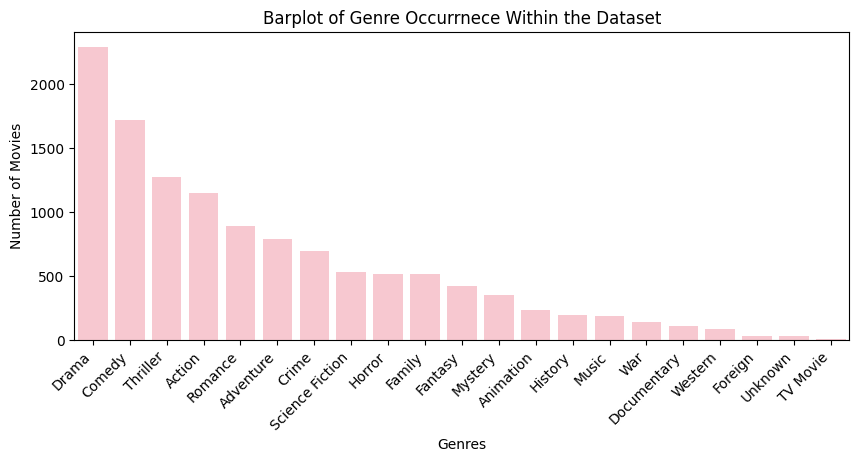

Looked at the correlations between the numeric columns
- generated a heatmap and pairplots
- strong positive correlation between revenue and vote_count (0.78)
    - shows that as the vote_count increases so does the revenue
- medium positive correlation between vote_average and runtime (0.37)
    - shows that as the runtime increases, the vote_average somewhat increases also
- medium positive correlation between vote_count and vote_average (0.31)
    - shows that as the vote_count increases, the vote_average somewhat increases also

In [ ]:
# Generate the correlation matrix
numeric = movies_modified[['release_date', 'runtime', 'vote_average', 'vote_count', 'revenue']]
correlation_matrix = numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Release Date, Runtime, Vote Average, Vote Count, and Revenue')
plt.tight_layout()
plt.show()

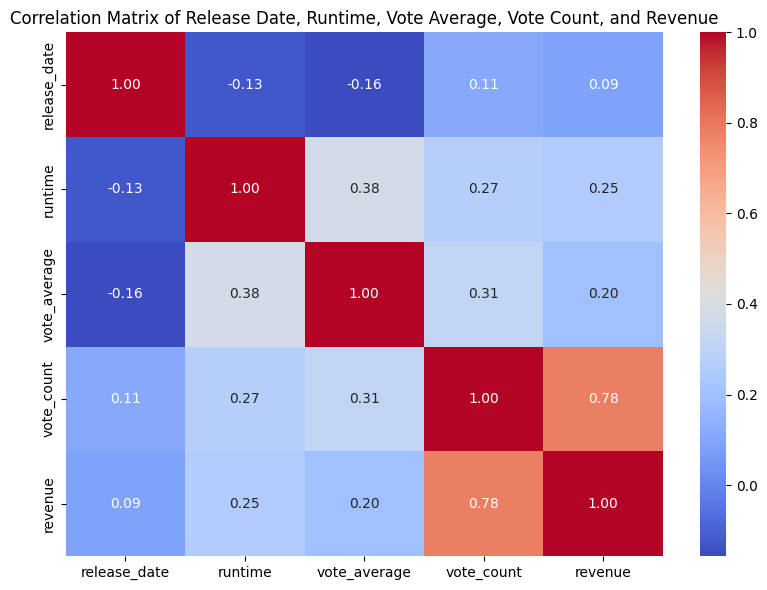

In [ ]:
# Generate pairplots of all numeric columns
sns.pairplot(movies_modified,
             vars=['release_date', 'runtime', 'vote_average', 'vote_count', 'revenue'],
             plot_kws={'alpha':0.5, 'size': 0.1})

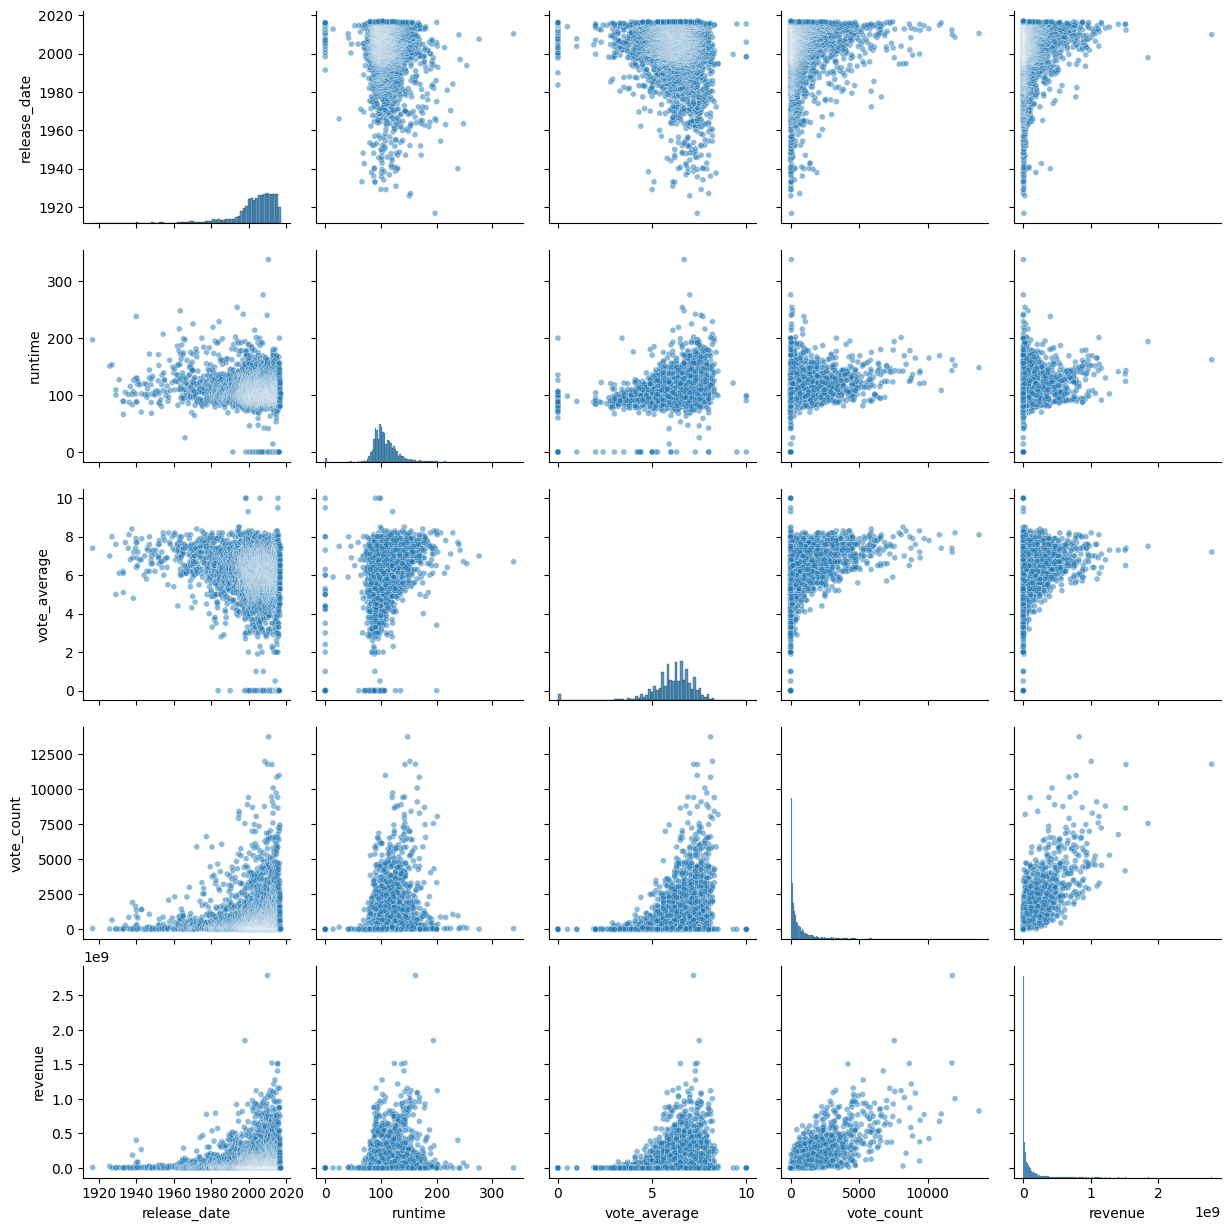

Looked at the data using `groupby`
- grouped revenue by genre: provide an idea of how each genre performed
    - can point to which genre is most popular (action, adventure) or least popular (documentary, foreign, TV movie, western)
    - assuming that revenue is a representation of how many people pay to watch the movie
- grouped vote_count by genre: provide an idea on how many people would watch each genre overall
    - can point to which genre is most watched (action, drama) or least watched (documentary, foreign, TV movie)
    - assuming that vote_count is a representation of how many people watch the movie
- grouped vote_average by genre: provide an idea of how people perceive each genre
    - can point to which genre is most liked (action, drama, thriller) or least liked (documentary, foreign, TV movie)
    - assuming that vote_average is a representation of how people who watched the movie rates it
- most popular genres could be more recommended and least popular genres could be less recommended

In [11]:
# Create a new dataframe with one row per genre
genre_exploded = movies_modified.explode('genre_names')

# Group revenue by genre to be plotted
grouped_genres = genre_exploded.groupby('genre_names')['revenue'].sum().reset_index()
grouped_genres.head(3)

# Group vote_counts by genre to be plotted
grouped_genresc = genre_exploded.groupby('genre_names')['vote_count'].sum().reset_index()
grouped_genresc.head(3)

# Group vote_average by genre to be plotted
grouped_genresa = genre_exploded.groupby('genre_names')['vote_average'].sum().reset_index()
grouped_genresa.head(3)


# Group by genre
#genre_exploded.groupby('genre_names')['revenue'].describe()
#genre_exploded.groupby('genre_names')['vote_average'].describe()

,genre_names,revenue
0,Action,162959914515
1,Adventure,164841561551
2,Animation,52812167865


,genre_names,vote_count
0,Action,1310730
1,Adventure,1130229
2,Animation,291604


,genre_names,vote_average
0,Action,6911.9
1,Adventure,4864.0
2,Animation,1483.9


In [ ]:
# Plot line graph that shows the revenue for each genre 
plt.figure(figsize=(8, 4))
plt.plot(grouped_genres['genre_names'], grouped_genres['revenue'], color='pink')
plt.title('Revenue for Each Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue (dollar)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot line graph that shows the vote_count for each genre
plt.figure(figsize=(8, 4))
plt.plot(grouped_genresc['genre_names'], grouped_genresc['vote_count'], color='pink')
plt.title('Votes for Each Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Votes')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot line graph that shows the vote_average for each genre
plt.figure(figsize=(8, 4))
plt.plot(grouped_genresa['genre_names'], grouped_genresa['vote_average'], color='pink')
plt.title('Rating for Each Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

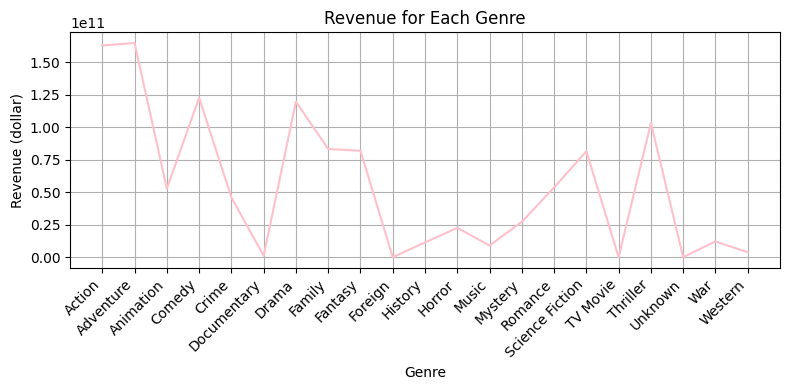
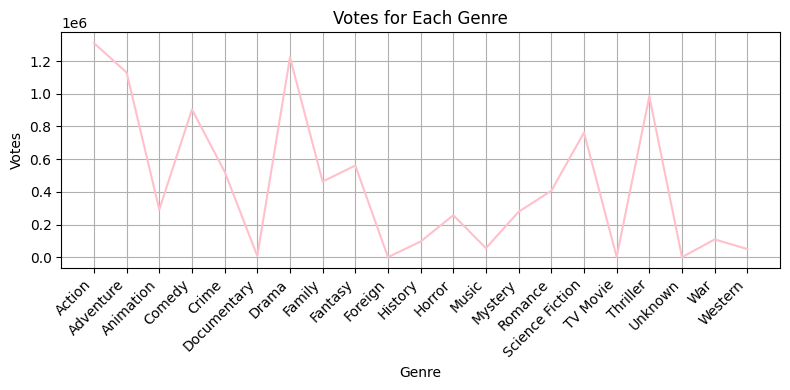
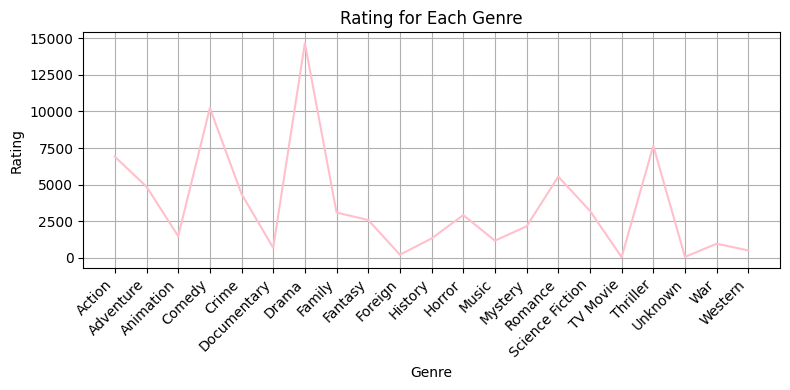

## **Task 2: Feature Analysis**
**Objectives:**
- Examine movie metadata such as genres, directors, cast, and descriptions to understand their role in influencing user preferences
- Explore user interaction metrics (ex: ratings, watch counts) to identify patterns in movie popularity and user preferences

## **Task 3: Recommendation Model Development**
**Objectives:**
- Demographic Filtering: implement a baseline system that recommends popular and highly rated movies to all users
- Content-Based Filtering: develop a recommendation model that uses movie metadata (ex: genres, actors, directors) to suggest similar movies based on a user's viewing history
- Collaborative Filtering: build a model that predict user preferences by analyzing interactions and matching users with similar tastes

## **Task 4: Evaluation of Recommendations**
**Objectives:**
- Measure the effectiveness of the recommendation system using metrics such as precision, recall, F1 score, and mean average precision (MAP)
- If possible, collect user feedback or simulate user studies to evaluat the relevance of the recommendations

## **Task 5: Visalization of Results**
**Objectives:**
- Create visulaizations to depcit relationships between user preferences, movie features, and recommendation performance
- Showcase trends in movie popularity, genre preferences, and user interaction patterns

## **Task 6: Integration with User Interface (Optional)**
**Objectives:**
- Develop a simple web or mobile interface to display recommended movies and allow users to provide feedback
- Include features for users to explore movies by genres, popularity, or personalized recommendations